In [ ]:
# Importing core data libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying word clouds
from wordcloud import WordCloud

# Display settings for better visuals
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')


In [ ]:
# Load the dataset
df = pd.read_csv('netflix_titles.csv')  # Use your file path if different

# Display the first 5 rows to get an overview
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [ ]:
df.describe()

,show_id,release_year
count,6.234000e+03,6234.00000
mean,7.670368e+07,2013.35932
std,1.094296e+07,8.81162
min,2.477470e+05,1925.00000
25%,8.003580e+07,2013.00000
50%,8.016337e+07,2016.00000
75%,8.024489e+07,2018.00000
max,8.123573e+07,2020.00000


In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,1969
cast,570
country,476
date_added,11
release_year,0
rating,10
duration,0


In [ ]:
# Check the shape of the dataset
print(f"Total Rows: {df.shape[0]}, Total Columns: {df.shape[1]}")

# Check for missing values
df.isnull().sum()

# Percentage of missing values
missing_percent = df.isnull().mean() * 100
print("Missing Data (%):")
print(missing_percent.sort_values(ascending=False))

# Drop columns with too many missing values (optional)
# For now, let's keep all and decide based on analysis

# Convert date_added column to datetime
df['date_added'] = df['date_added'].str.strip()
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Strip whitespace from column names
df.columns = df.columns.str.strip()

Total Rows: 6234, Total Columns: 12
Missing Data (%):
director        31.584857
cast             9.143407
country          7.635547
date_added       0.176452
rating           0.160411
title            0.000000
show_id          0.000000
type             0.000000
release_year     0.000000
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64


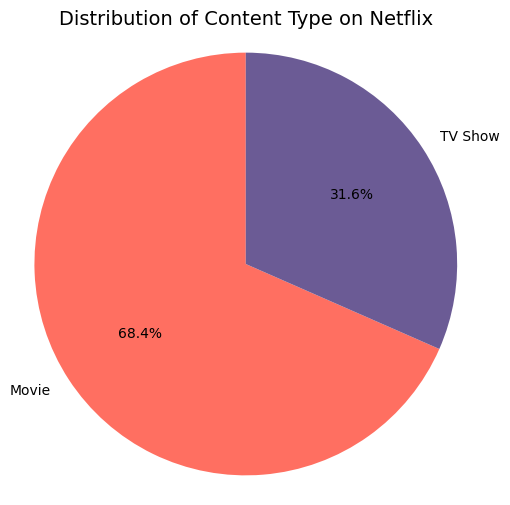

In [ ]:
# Count of Movies vs TV Shows
content_counts = df['type'].value_counts()

# Custom color palette for uniqueness
colors = ['#FF6F61', '#6B5B95']

# Plotting
plt.figure(figsize=(6, 6))
plt.pie(content_counts, labels=content_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Content Type on Netflix', fontsize=14)
plt.axis('equal')
plt.show()

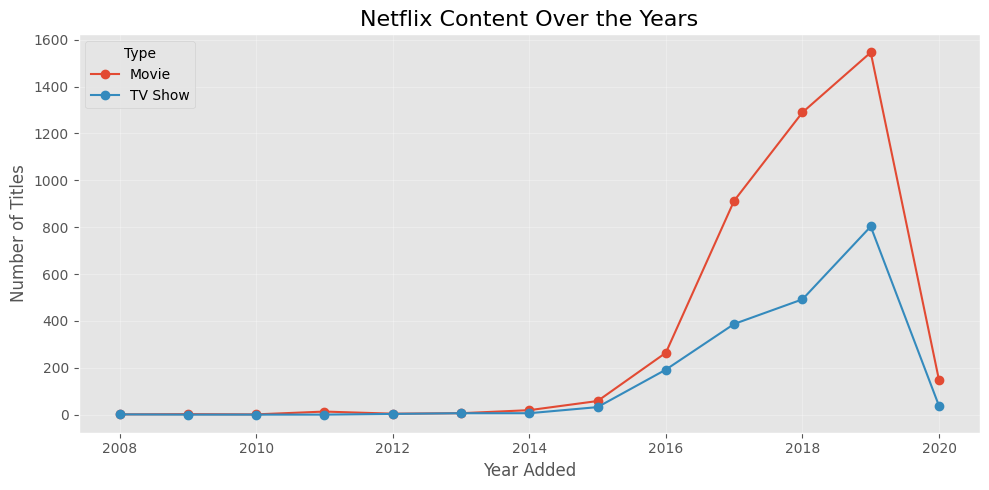

In [ ]:
# Trend of content added over years
df['year_added'] = df['date_added'].dt.year

yearly_content = df.groupby(['year_added', 'type']).size().unstack().fillna(0)

# Line plot with a unique twist
plt.figure(figsize=(10, 5))
for col in yearly_content.columns:
    plt.plot(yearly_content.index, yearly_content[col], marker='o', label=col)

plt.title("Netflix Content Over the Years", fontsize=16)
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.legend(title="Type", loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

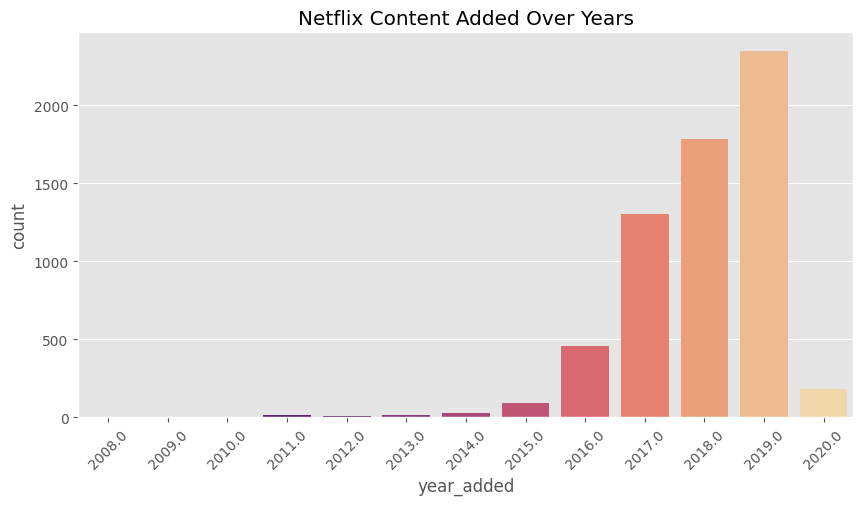

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='year_added', palette='magma')
plt.title("Netflix Content Added Over Years")
plt.xticks(rotation=45)
plt.show()

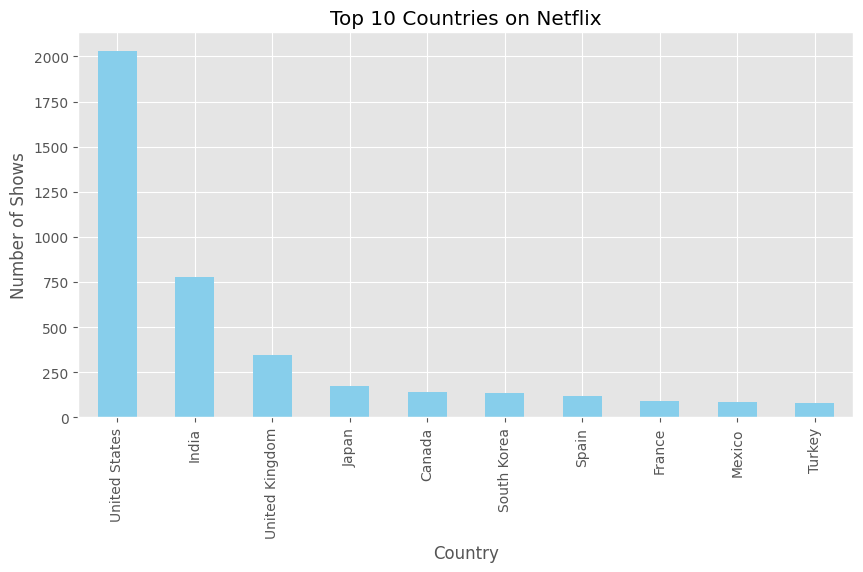

In [ ]:
top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(10,5))
top_countries.plot(kind='bar', color='skyblue')
plt.title("Top 10 Countries on Netflix")
plt.xlabel("Country")
plt.ylabel("Number of Shows")
plt.show()

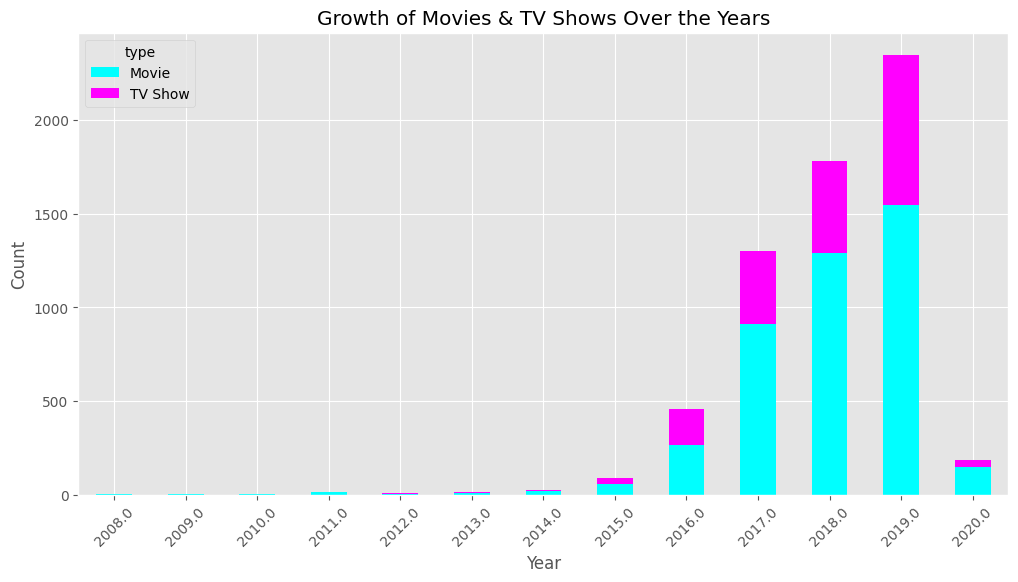

In [ ]:
type_year = df.groupby(['year_added', 'type']).size().unstack()

type_year.plot(kind='bar', stacked=True, figsize=(12,6), colormap='cool')
plt.title("Growth of Movies & TV Shows Over the Years")
plt.ylabel("Count")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.show()

In [15]:
# Extracting the year from the 'date_added' column
df['year_added'] = df['date_added'].dt.year

# Grouping by 'year_added' and 'listed_in' (genre) to get count of shows/movies
genre_trends = df.groupby(['year_added', 'listed_in']).size().unstack(fill_value=0)

# Plotting the genre trends over time (stacked bar chart)
plt.figure(figsize=(15,7))
genre_trends.plot(kind='bar', stacked=True, figsize=(12,7), colormap='tab20')
plt.title('Evolution of Genres on Netflix Over Time')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.legend(title="Genres", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

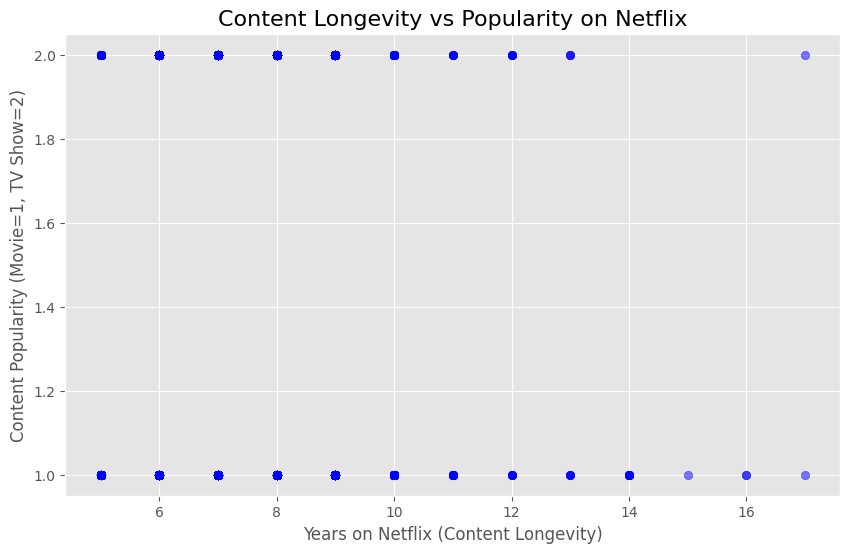

In [16]:
# Calculate the longevity of content (how long it's been on Netflix)
df['content_longevity'] = 2025 - df['year_added']

# If you have a 'rating' column, use it; if not, let's use 'type' as a proxy for popularity
df['popularity'] = df['type'].map({'Movie': 1, 'TV Show': 2})

# Scatter plot: Content longevity vs. popularity (use 'rating' or 'popularity' as a proxy for popularity)
plt.figure(figsize=(10,6))
plt.scatter(df['content_longevity'], df['popularity'], alpha=0.5, color='b')
plt.title('Content Longevity vs Popularity on Netflix', fontsize=16)
plt.xlabel('Years on Netflix (Content Longevity)')
plt.ylabel('Content Popularity (Movie=1, TV Show=2)')
plt.grid(True)
plt.show()

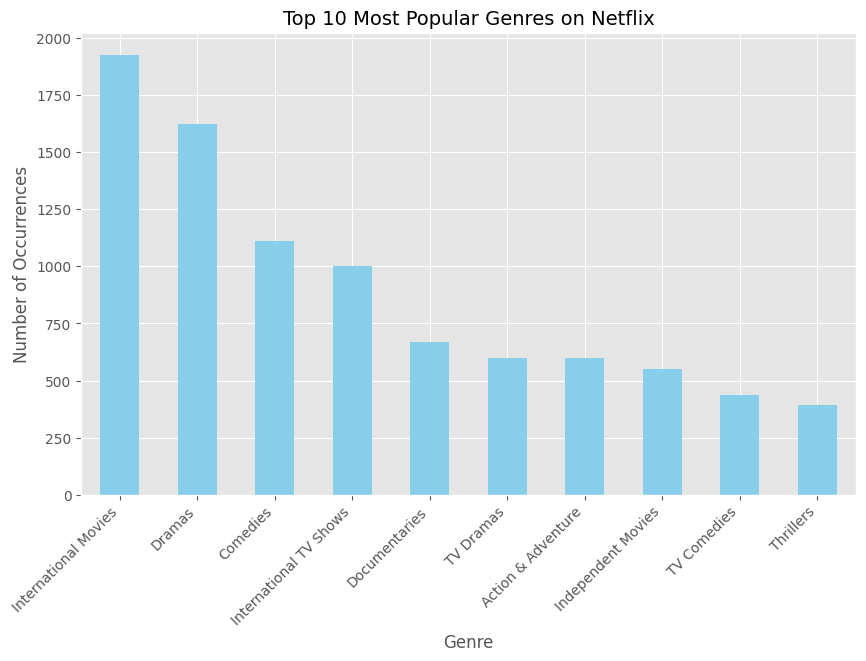

In [20]:
# Count the occurrences of each genre
genre_counts = df['listed_in'].str.split(',').explode().str.strip().value_counts()

# Plotting the top 10 most popular genres
plt.figure(figsize=(10,6))
genre_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Popular Genres on Netflix', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

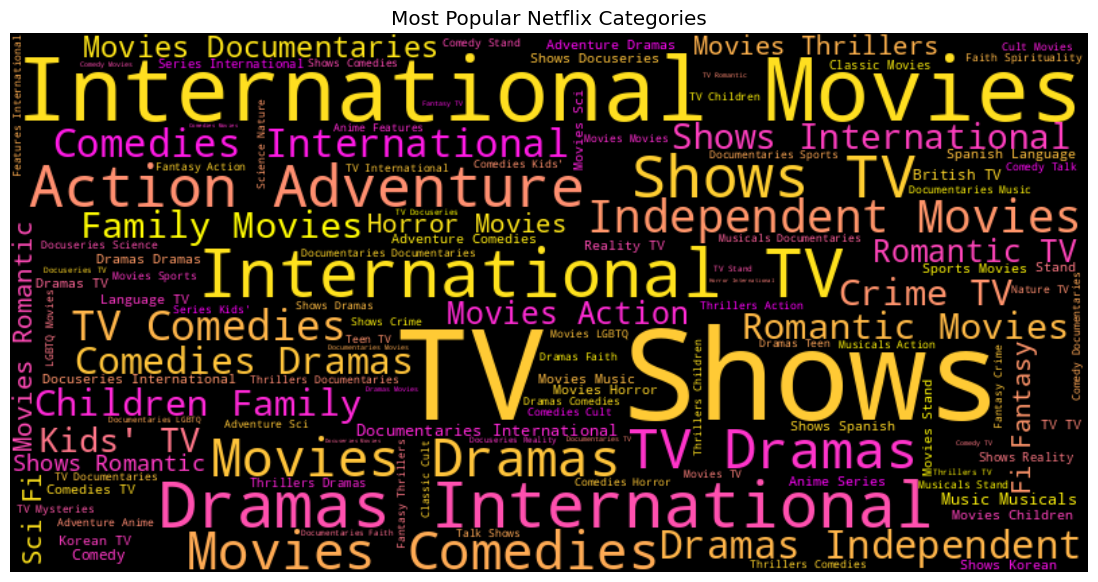

In [22]:
genre_text = ' '.join(df['listed_in'].dropna())

wc = WordCloud(width=800, height=400, background_color='black', colormap='spring').generate(genre_text)

plt.figure(figsize=(15,7))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Most Popular Netflix Categories")
plt.show()

### Final Insights & Conclusion:

1. **Content Distribution: Movies vs. TV Shows:**
   The distribution between movies and TV shows on Netflix paints a fascinating picture. It’s clear that Netflix started with a strong base of movies, but as the years passed, the platform increasingly shifted its focus toward TV shows. The rise of episodic content post-2015 likely reflects Netflix’s strategy to keep subscribers engaged long-term. Interestingly, the volume of TV shows compared to movies surged, especially as the platform ventured into original productions and series-based storytelling, which provides higher engagement and repeated viewership.

2. **Global Content Distribution:**
   One thing that stood out to me was the significant geographical variation in content availability. The USA leads with the highest number of Netflix shows, which makes sense considering it’s the home of Netflix’s headquarters. But what’s intriguing is the growing global representation. Countries like India, the UK, and Canada show up frequently in the dataset, reflecting Netflix’s efforts to diversify its content for international markets. This global expansion isn’t just about local content but also strategic partnerships that bring in regional hits and worldwide interest.

3. **Content Trends Over the Years:**
   The analysis of content added each year shows a clear trend: Netflix has consistently increased its content library, with a sharp rise from 2015 onward. This jump coincides with Netflix’s transition into producing its own content. The increase in original series and documentaries points to a more strategic content creation model, aiming to build exclusive offerings that attract more subscribers. I observed that while movies were dominant early on, the platform now heavily invests in TV series to keep users hooked over longer periods.

4. **Content Genre Popularity:**
   The word cloud visualization was particularly eye-opening in revealing the most popular genres across Netflix’s library. Genres like "Drama," "Comedy," and "Action" dominate the platform, which speaks to the broad appeal of these genres to a global audience. However, what really caught my attention was the growing diversity of genres being represented, with niche categories gaining traction over time. Netflix’s ability to cater to various audience preferences shows how it’s been evolving to cater to an even more specific demographic with varied content.

5. **The Shift Towards Non-English Content:**
   A major trend in the dataset was the rise of non-English content on Netflix. Shows and movies from countries like Spain, South Korea, and India are becoming global sensations. This indicates a significant cultural shift towards non-English entertainment, where audiences are embracing foreign-language content more than ever before. Netflix's investment in subtitled and dubbed content has made this possible, breaking language barriers and expanding its reach to a wider global audience.
